## basic regression

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3,suppress=True)

In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## The Auto MPG dataset

get the data

In [88]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [89]:

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


clean the dataset

In [90]:
##he dataset contains a few unkown values
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [91]:
##drop those rows to keep the inital tutorial values
dataset = dataset.dropna()

In [92]:
dataset['Origin'] = dataset['Origin'].map({1:'USA',2:'Europe',3:'Japan'})

In [93]:
##tep is to one-hot encode the values in the column with pd.get_dummies
dataset = pd.get_dummies(dataset,columns=['Origin'],prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


split the data into training and test sets

In [94]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

inspect the data

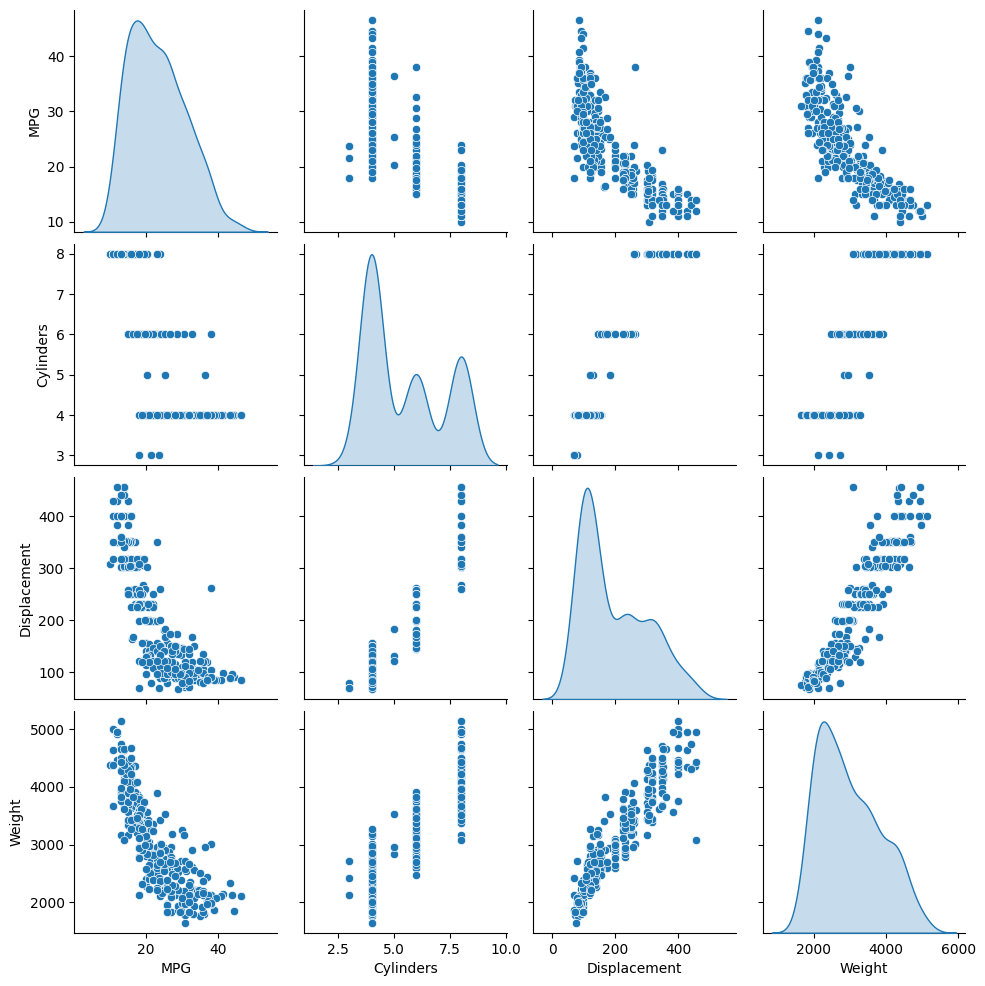

In [95]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']],diag_kind='kde')


In [96]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


split the features from the labels

In [97]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [98]:
print(test_features['Horsepower'].shape)
print(test_labels.shape)

(78,)
(78,)


normalization

In [99]:
train_dataset.describe().transpose()[['mean','std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642


the normalization layers


In [100]:
normalizer = tf.keras.layers.Normalization(axis=-1)
    

In [101]:
train_features_array = train_features.to_numpy(dtype=np.float32)
normalizer.adapt(train_features_array)


In [102]:
print(normalizer.mean.numpy())


[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [103]:
first = train_features.iloc[:1].to_numpy(dtype=np.float32)

with np.printoptions(precision=2, suppress=True):
    print('First example:',first)
    print()
    print('Normalized:',normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


## linear regression

linesar regression with one variable

In [104]:
##numpy array made of 'horsepower' features
horsepower= np.array(train_features['Horsepower'])

horsepower_normilizer = layers.Normalization(input_shape=[1,],axis=None)
horsepower_normilizer.adapt(horsepower)

c:\Users\ASUS\Documents\Study Material\Development\FrameWorks\Tensorflow\.venv\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [105]:
#keras sequential model
horsepower_model = tf.keras.Sequential([
    horsepower_normilizer,
    layers.Dense(units=1)
])
horsepower_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [106]:
horsepower_model.predict(horsepower[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[-1.012],
       [-0.572],
       [ 1.868],
       [-1.419],
       [-1.283],
       [-0.504],
       [-1.52 ],
       [-1.283],
       [-0.334],
       [-0.572]], dtype=float32)

In [107]:
horsepower_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
                        loss='mean_absolute_error')


In [108]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    #suppress logging
    verbose=0,
    #calculate validation resutls on 20% of the training data
    validation_split=0.2
)

CPU times: total: 12.7 s
Wall time: 11.5 s


In [109]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804786,4.177583,95
96,3.802516,4.197572,96
97,3.802546,4.190520,97
98,3.808678,4.207911,98
99,3.803954,4.173254,99


In [110]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    

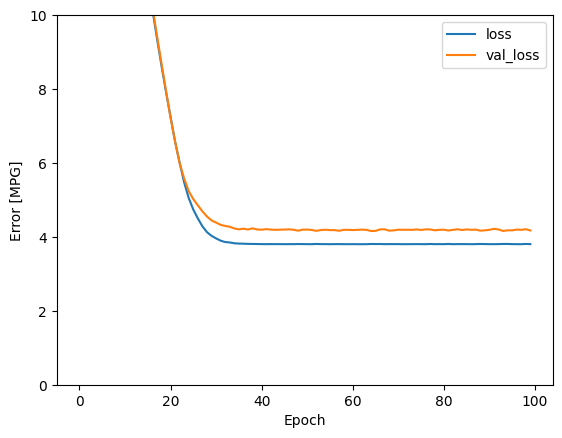

In [111]:
plot_loss(history)

In [112]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose= 0
)


In [113]:
x = tf.linspace(0.0,250, 251)
y = horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [114]:
def plot_horsepower(x, y):
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

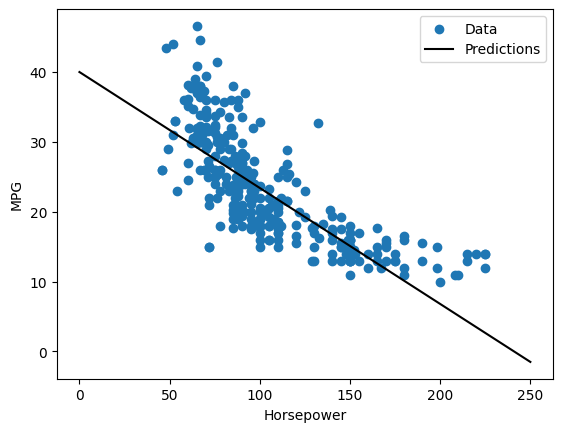

In [115]:
plot_horsepower(x, y)

linear regression with multiple inputs

In [116]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [117]:
linear_model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([[-1.027],
       [-1.672],
       [ 0.604],
       [-2.025],
       [ 0.093],
       [-0.662],
       [ 0.191],
       [ 0.051],
       [-0.199],
       [ 1.052]], dtype=float32)

In [118]:
linear_model.layers[1].kernel

<Variable path=sequential_7/dense_15/kernel, shape=(9, 1), dtype=float32, value=[[ 0.761]
 [ 0.159]
 [ 0.165]
 [-0.399]
 [ 0.198]
 [-0.451]
 [ 0.724]
 [ 0.698]
 [ 0.054]]>

In [119]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [120]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    #suppress logging
    verbose=0,
    #calculate validation results on 20% of the training data.
    validation_split=0.2
)

CPU times: total: 11.2 s
Wall time: 10.3 s


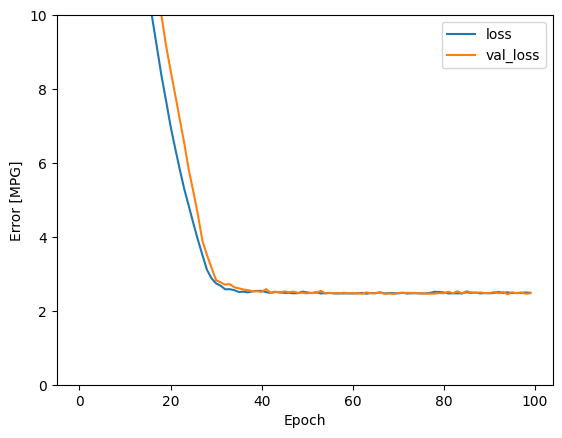

In [121]:
plot_loss(history)

In [122]:
test_results['linear_model'] = linear_model.evaluate(
    test_features,
    test_labels,
    verbose=0
)


## regression with a deep neural network(DNN)

In [123]:
def build_and_complie_model(norm):
    model = keras.Sequential([
        norm, 
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

regression using DNN and a single input

In [124]:
dnn_horsepower_model = build_and_complie_model(horsepower_normilizer)

In [125]:
dnn_horsepower_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [126]:
##traint the model with keras
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100
)

UsageError: Line magic function `%%time` not found.


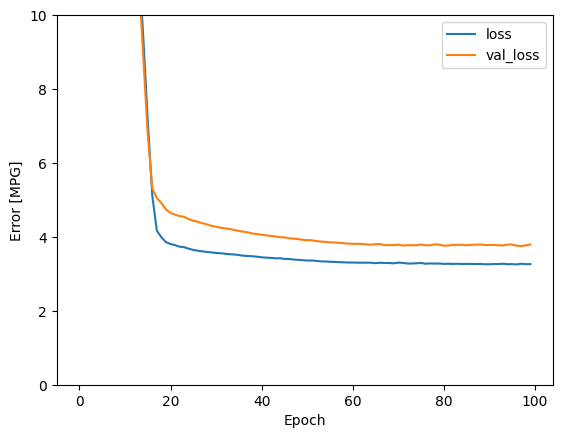

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


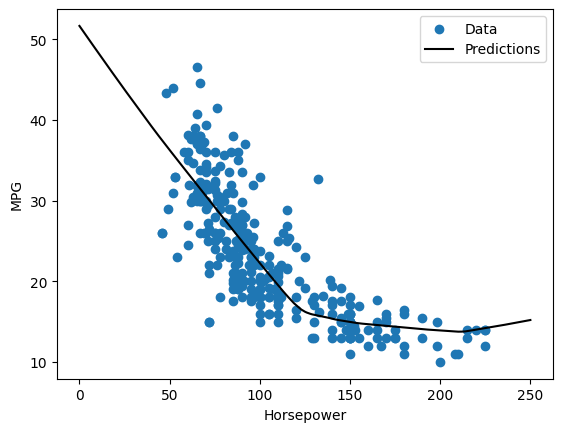

In [ ]:
plot_horsepower(x, y)

In [85]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels,
    verbose=0    
)

regression using a DNN and multiple inputs

In [64]:
dnn_model = build_and_complie_model(normalizer)
dnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 9)              │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [65]:
%%time 
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0,epochs=100
)

CPU times: total: 13.1 s
Wall time: 11.6 s


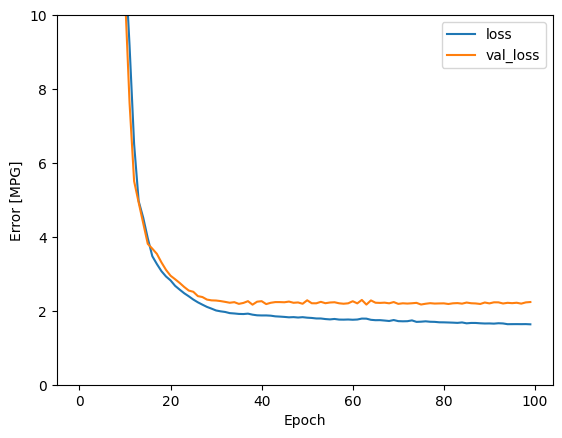

In [66]:
plot_loss(history)

In [67]:
test_labels['dnn_model'] = dnn_model.evaluate(test_features,test_labels,verbose=0)

In [49]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.642450
linear_model,2.464031
dnn_horsepower_model,2.909223


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


ValueError: x and y must be the same size

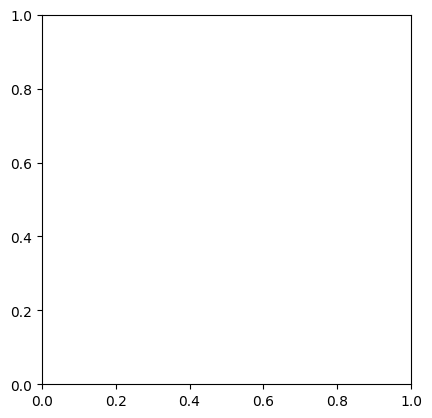

In [68]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)